## Imports & Configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [4]:
TITLE_BASICS_PATH = r".\data\title.basics.tsv"
TITLE_RATINGS_PATH = r".\data\title.ratings.tsv"

In [3]:
title_basics_df = pd.read_csv(TITLE_BASICS_PATH, sep="\t", low_memory=False, na_values="\\N", on_bad_lines='skip')

In [5]:
title_ratings_df = pd.read_csv(TITLE_RATINGS_PATH, sep="\t", low_memory=False, na_values="\\N", on_bad_lines='skip')

## Data Analysis & EDA

In [9]:
df_list = [title_basics_df, title_ratings_df]

for df in df_list:
    print("First 5 row:\n")
    print(df.head())
    print("Shape:\n")
    print(df.shape)
    print("Information:\n")
    print(df.info())
    print("Description:\n")
    print(df.describe())

First 5 row:

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear runtimeMinutes                    genres  
0        0     1894.0      NaN              1         Documentary,Short  
1        0     1892.0      NaN              5           Animation,Short  
2        0     1892.0      NaN              5  Animation,Comedy,Romance  
3        0     1892.0      NaN             12           Animation,Short  
4        0     1893.0      NaN              1                     Short  
Shape:

(11957318, 9)
Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11957318 en

In [44]:
movie_content_df = title_basics_df.merge(
    title_ratings_df[['tconst', 'averageRating', 'numVotes']],
    on='tconst',
    how='left'
)

In [45]:
movie_content_df = title_basics_df[(title_basics_df["titleType"] == "movie") | (title_basics_df["titleType"] == "tvMovie")]
movie_content_df.shape # It must be movie + tvMovie -> (727974 + 152585)

(880559, 9)

In [46]:
movie_content_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100,NaN
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90,Drama


In [47]:
movie_content_df.loc[:, "genres"] = movie_content_df["genres"].fillna("")

In [50]:
genres_dummies = movie_content_df["genres"].str.get_dummies(sep=",")

In [51]:
genres_dummies

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957236,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11957241,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11957248,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11957258,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
movie_content_df_encoded = pd.concat([movie_content_df, genres_dummies], axis=1)

In [53]:
movie_content_df_encoded.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,0,...,0,0,1,0,0,0,0,0,0,0
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,100,"Documentary,News,Sport",0,...,1,0,0,0,0,1,0,0,0,0
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,NaN,100,,0,...,0,0,0,0,0,0,0,0,0,0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,NaN,70,"Action,Adventure,Biography",1,...,0,0,0,0,0,0,0,0,0,0
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907.0,NaN,90,Drama,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
movie_content_df_encoded.shape

(880559, 37)

In [55]:
genre_columns = movie_content_df_encoded.columns[ movie_content_df_encoded.columns.get_loc("Action"): ]  # "Action" sütunundan sonrasını al

In [56]:
genre_counts = movie_content_df_encoded[genre_columns].sum().sort_values(ascending=False)

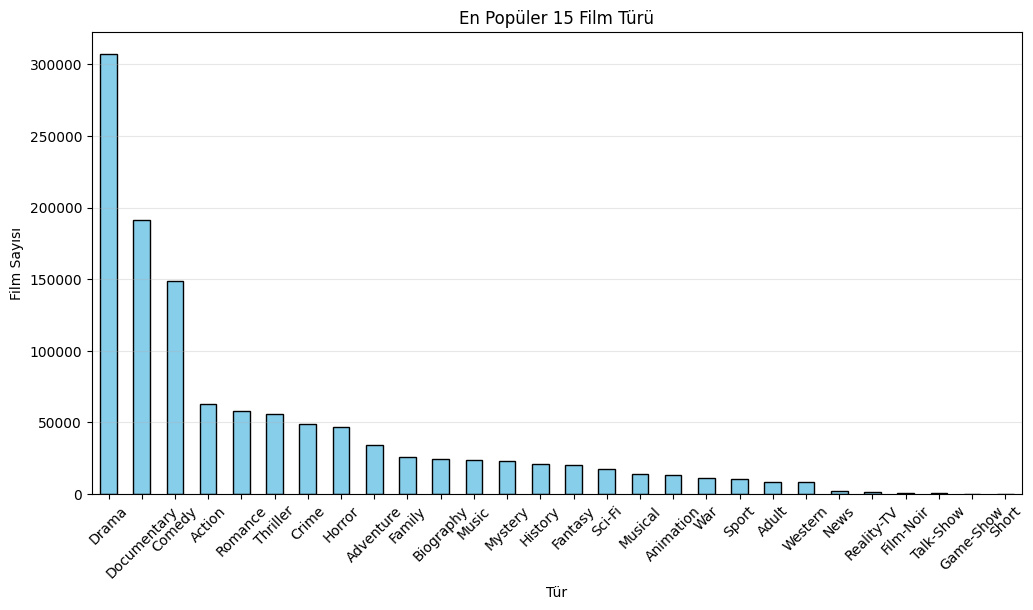

In [63]:
plt.figure(figsize=(12,6))
genre_counts.head(28).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("En Popüler 15 Film Türü")
plt.xlabel("Tür")
plt.ylabel("Film Sayısı")
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [30]:
genre_counts

genres
Drama          307158
Documentary    191450
Comedy         148738
Action          63038
Romance         58263
Thriller        55955
Crime           48562
Horror          46588
Adventure       33892
Family          25991
Biography       24545
Music           24059
Mystery         22973
History         20604
Fantasy         20088
Sci-Fi          17513
Musical         14008
Animation       13220
War             11275
Sport           10302
Adult            8662
Western          8467
News             1875
Reality-TV       1693
Film-Noir         880
Talk-Show         514
Game-Show         144
Short               7
Name: count, dtype: int64